In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [3]:
def S(q):
    return (q**2)

def D(q):
    return (q - 20)**2


q = np.linspace(0, 16, 1000)

Text(0, 0.5, 'Price')

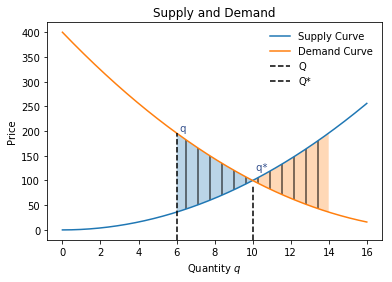

In [10]:
plt.plot(q, S(q), label = "Supply Curve")
plt.plot(q, D(q), label = "Demand Curve")
plt.axvline(x=6, ymax=D(6)/400, color='black', linestyle='--', label='Q')
plt.text(x=6, y=200, s=' q', alpha=1, color='#334f8d')
plt.axvline(x=10, ymax=D(10)/400, color='black', linestyle='--', label='Q*')
plt.text(x=10, y=120, s=' q*', alpha=1, color='#334f8d')

#plt.fill_between(q, D(q), 100, where = (D(q) > 100), color = 'green', alpha = 0.5, hatch = '-')
#plt.fill_between(q, S(q), 170, where = (S(q) > 50 )) 
plt.fill_between(q, D(q), S(q), where = (q<10) & (q>6), alpha = 0.3, hatch = '|')
plt.fill_between(q, D(q), S(q), where = (q>10) & (q<14), alpha = 0.3, hatch = '|')

plt.title("Supply and Demand")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("Price")

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
sm.init_printing(use_unicode=True)

In [210]:
#_par means parameter
a_par = 30
b_par = 0.5
c_par = 5
d_par = 2
eps_par = 2

def B_derivative(q):
    return (a_par - b_par * q)

def C_derivative(q):
    return (c_par + d_par * q)

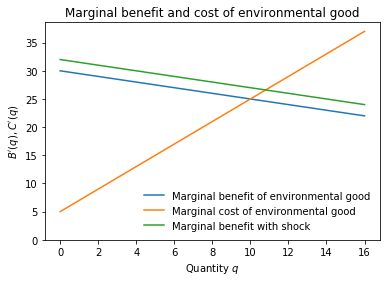

In [211]:
q = np.linspace(0, 16, 1000)
plt.plot(q, B_derivative(q), label = "Marginal benefit of environmental good")
plt.plot(q, C_derivative(q), label = "Marginal cost of environmental good")
plt.plot(q, B_der_shock(q), label = "Marginal benefit with shock")
plt.title("Marginal benefit and cost of environmental good")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("$B'(q),C'(q)$")
plt.ylim(0)

In [212]:
import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [146]:
def interactive_figure(a_par, b_par, c_par, d_par, eps_par, q):
    
    q = np.linspace(0, 16, 1000)
    plt.plot(q, B_derivative(q), label = "Marginal benefit of environmental good")
    plt.plot(q, C_derivative(q), label = "Marginal cost of environmental good")
    plt.plot(q, B_der_shock(q), label = "Marginal benefit with shock")
    plt.title("Marginal benefit and cost of environmental good")
    plt.legend(frameon = False)
    plt.xlabel("Quantity $q$")
    plt.ylabel("$B'(q),C'(q)$")
    plt.ylim(0)

In [153]:
def plot(eps_par):
    widgets.interact(interactive_figure,
    a_par=widgets.fixed(a_par),
    b_par=widgets.fixed(b_par),
    c_par=widgets.fixed(c_par),
    d_par=widgets.fixed(d_par),
    q=widgets.fixed(q),
    eps_par=widgets.FloatSlider(description="shock", min=-5, max=5, step=.05, value=0),
        continuous_update=False,
);

plot(q)

interactive(children=(FloatSlider(value=0.0, description='shock', max=5.0, min=-5.0, step=0.05), Output()), _d…

In [86]:
def interactive_figure(alphas,p1,p2,k):
    
    # a. calculations
    dist,_total = find_demand_good_1(alphas,p1,p2,k)
    
    # b. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.hist(dist,density=True)
    ax.set_xlim([0,4]) # fixed x range
    ax.set_ylim([0,0.8]) # fixed y range

In [ ]:
widgets.interact(interactive_figure,
    alphas=widgets.fixed(alphas),
    p1=widgets.FloatSlider(description="$p_1$", min=0.1, max=5, step=0.05, value=2),
    p2=widgets.fixed(p2),
    k=widgets.fixed(k)
);

In [229]:
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]  # diagonal covariance

In [340]:
import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 1).T
print(x)
print(y)

[1.27337917]
[0.76575392]


In [334]:
def B_derivative_shock(q):
    return (a_par - b_par * q + x[0])

def C_derivative_shock(q):
    return (c_par + d_par * q + y[0])

print(B_derivative_shock(6))
print(C_derivative_shock(6))

27.67214384767089
17.0010489438257


In [335]:
a = sm.symbols('a')
b = sm.symbols('b')
c = sm.symbols('c')
d = sm.symbols('d')
q = sm.symbols('q')
p = sm.symbols('p')

#First we set marginal cost and benefit equal
equilibrium = sm.Eq(a-b*q,c+d*q)
equilibrium

#Solve for q
opt_q = sm.solve(equilibrium,q)
opt_q

#Solve for P
MC = sm.Eq(c+d*q,p)
MC_subs = MC.subs(q,opt_q[0])
opt_p = sm.solve(MC_subs,p)
opt_p

MC_num = sm.Eq(a_par - b_par * q,p)
MB_num = sm.Eq(c_par + d_par * q,p)

sol_dict = sm.solve((MC_num,MB_num), (q, p))
print(f'p = {sol_dict[p]}')
print(f'q = {sol_dict[q]}')

#nyt
MC_num_shock = sm.Eq(a_par - b_par * q + x[0],p)
MB_num_shock = sm.Eq(c_par + d_par * q + y[0],p)
sol_dict_shock = sm.solve((MC_num_shock,MB_num_shock), (q,p))
print(f'p = {sol_dict_shock[p]}')
print(f'q = {sol_dict_shock[q]}')

temp_a1 = sol_dict[q]
temp_a2 = sol_dict[p]
temp_b1 = sol_dict_shock[q]
temp_b2 = sol_dict_shock[p]

p = 25.0000000000000
q = 10.0000000000000
p = 25.5379248669019
q = 10.2684379615381


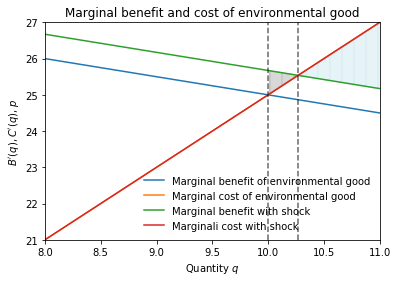

In [338]:
q = np.linspace(0, 16, 1000)
plt.plot(q, B_derivative(q), label = "Marginal benefit of environmental good")
plt.plot(q, C_derivative(q), label = "Marginal cost of environmental good")
plt.plot(q, B_derivative_shock(q), label = "Marginal benefit with shock")
plt.plot(q, C_derivative_shock(q), label = "Marginali cost with shock")
plt.title("Marginal benefit and cost of environmental good")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("$B'(q), C'(q)$, $p$")
plt.ylim(21,27)
plt.xlim(8,11)

#add lines in equilibria
plt.axvline(x=temp_a1, ymax=D(temp_a1), alpha=0.6, color='black', linestyle='--', label='Q')
#plt.text(x=temp_a1, y=temp_a2, s=' Eq', alpha=1, color='black')
plt.axvline(x=temp_b1, ymax=D(temp_b1), alpha=0.6, color='black', linestyle='--', label='Q*')
#plt.text(x=sol_dict[p], y=sol_dict[q], s=' q*', alpha=1, color='#334f8d')

#fills the area of DWL
plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q<temp_b1) & (q>temp_a1), alpha = 0.3, color='grey', hatch = '|')
plt.fill_between(q, B_derivative_shock(q), C_derivative_shock(q), where = (q>temp_b1), alpha = 0.3, color='lightblue', hatch = '|')
